K means is a non supervised clustering algorithm. It works well with data having less outliers.
In below project I have tried this algorithm on breast cancer dataset.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [16]:
data=pd.read_csv('BR.csv')

In [17]:
data.columns=[f'att_{i}' for i in range(data.shape[1])]
print(data.columns)

Index(['att_0', 'att_1', 'att_2', 'att_3', 'att_4', 'att_5', 'att_6', 'att_7',
       'att_8', 'att_9', 'att_10', 'att_11', 'att_12', 'att_13', 'att_14',
       'att_15', 'att_16', 'att_17', 'att_18', 'att_19', 'att_20', 'att_21',
       'att_22', 'att_23', 'att_24'],
      dtype='object')


In [18]:
skew_dict={f'att_{i}:{data[col].skew()}' for i,col in enumerate(data.columns)}


In [19]:
att_2_missing = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
att_3_missing = SimpleImputer(missing_values=np.nan, strategy='mean')
att_4_missing = SimpleImputer(missing_values=np.nan, strategy='mean')
att_5_missing = SimpleImputer(missing_values=np.nan, strategy='median')
att_7_missing = SimpleImputer(missing_values=np.nan, strategy='mean')
att_8_missing = SimpleImputer(missing_values=np.nan, strategy='mean')
att_9_missing = SimpleImputer(missing_values=np.nan, strategy='median')
att_10_missing = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
att_11_missing = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
att_12_missing = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
att_13_missing = SimpleImputer(missing_values=np.nan, strategy='mean')
att_14_missing = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
att_15_missing = SimpleImputer(missing_values=np.nan, strategy='mean')
att_16_missing = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
att_17_missing = SimpleImputer(missing_values=np.nan, strategy='mean')
att_18_missing = SimpleImputer(missing_values=np.nan, strategy='mean')
att_22_missing = SimpleImputer(missing_values=np.nan, strategy='mean')

In [20]:
missing_imputer = ColumnTransformer(transformers=[
    ('tnf2',att_2_missing,['att_2']),
    ('tnf3',att_3_missing,['att_3']),
    ('tnf4',att_4_missing,['att_4']),
    ('tnf5',att_5_missing,['att_5']),
    ('tnf7',att_7_missing,['att_7']),
    ('tnf8',att_8_missing,['att_8']),
    ('tnf9',att_9_missing,['att_9']),
    ('tnf10',att_10_missing,['att_10']),
    ('tnf11',att_11_missing,['att_11']),
    ('tnf12',att_12_missing,['att_12']),
    ('tnf13',att_13_missing,['att_13']),
    ('tnf14',att_14_missing,['att_14']),
    ('tnf15',att_15_missing,['att_15']),
    ('tnf16',att_16_missing,['att_16']),
    ('tnf17',att_17_missing,['att_17']),
    ('tnf18',att_18_missing,['att_18']),
    ('tnf22',att_22_missing,['att_22']),
],remainder='passthrough')

In [21]:
processed_data_1=pd.DataFrame(missing_imputer.fit_transform(data),columns = data.columns)



In [22]:
def outlier_modifier(df):
    q1=df.describe()['25%']
    q3=df.describe()['75%']
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    df = np.where(df >= upper_limit,
        upper_limit,
        np.where(df <= lower_limit,
        lower_limit,
        df))
    return df
    
    

In [23]:
for col in data.columns:
    processed_data_1[col]=outlier_modifier(processed_data_1[col])
    


In [24]:
att_0_scalar = MinMaxScaler()
att_4_scalar = MinMaxScaler()
att_6_scalar = MinMaxScaler()
att_8_scalar = FunctionTransformer(np.log1p)
att_10_scalar = MinMaxScaler()
att_11_scalar = FunctionTransformer(np.log1p)
att_15_scalar = FunctionTransformer(np.log1p)
att_17_scalar = MinMaxScaler()
att_21_scalar = FunctionTransformer(np.log1p)
att_22_scalar = MinMaxScaler()
att_23_scalar = FunctionTransformer(np.log1p)
att_24_scalar = FunctionTransformer(np.log1p)

In [25]:
distribution_handler = ColumnTransformer(transformers=[
    ('tnf_0',att_0_scalar,['att_0']),
    ('tnf_4',att_4_scalar,['att_4']),
    ('tnf_6',att_6_scalar,['att_6']),
    ('tnf_8',att_8_scalar,['att_8']),
    ('tnf_10',att_10_scalar,['att_10']),
    ('tnf_11',att_11_scalar,['att_11']),
    ('tnf_15',att_15_scalar,['att_15']),
    ('tnf_17',att_17_scalar,['att_17']),
    ('tnf_21',att_21_scalar,['att_21']),
    ('tnf_22',att_22_scalar,['att_22']),
    ('tnf_23',att_23_scalar,['att_23']),
    ('tnf_24',att_24_scalar,['att_24']),

],remainder='passthrough')

In [26]:
processed_data_2=pd.DataFrame(distribution_handler.fit_transform(processed_data_1),
                              columns = processed_data_1.columns)

In [44]:
f=PCA()
f.fit(processed_data_2)


PCA()

Text(0, 0.5, 'Cumulative variance ratio')

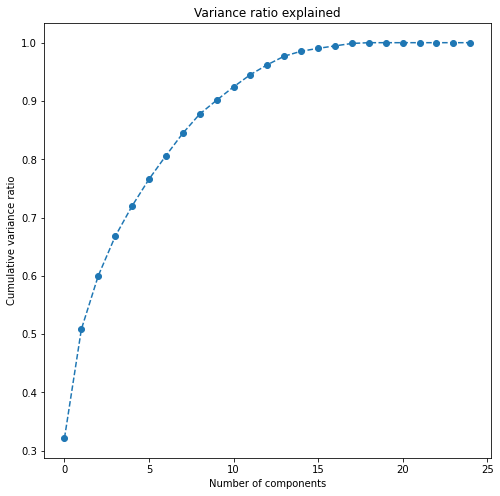

In [49]:
plt.figure(figsize=(8,8))
f.explained_variance_ratio_.cumsum()
plt.plot(f.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Variance ratio explained')
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance ratio')

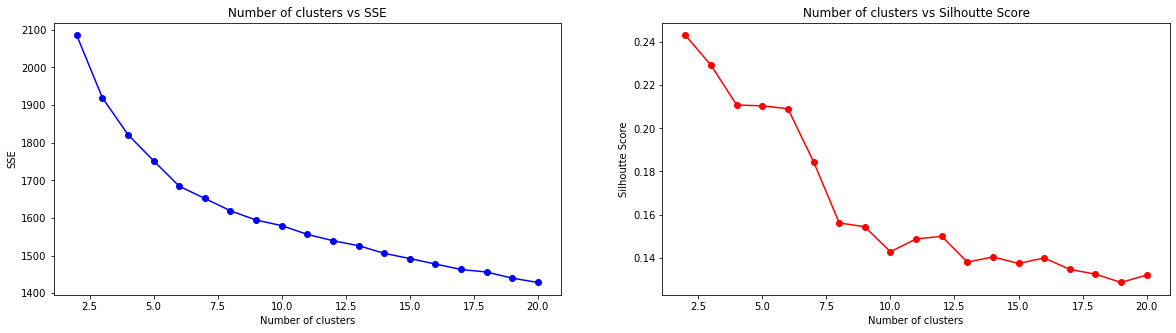

In [65]:
fs=PCA(n_components=12)
x=fs.fit_transform(processed_data_2)


errors=[]
sih=[]
max_clusters=20
for i in range(2,max_clusters+1):
    n_clusters=i
    model=KMeans(n_clusters=n_clusters, random_state=0).fit(x)
    p=model.transform(x)
    error=np.sum(np.min(p,axis=1))
    errors.append(error)
    sih.append(silhouette_score(x,model.labels_))

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(range(2,max_clusters+1),errors,marker='o',color='blue')
plt.title('Number of clusters vs SSE')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.subplot(1,2,2)
plt.plot(range(2,max_clusters+1),sih,marker='o',color='red')
plt.title('Number of clusters vs Silhoutte Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()


